#    



# Implementing Logistic Regression

## Summary: randomly initialize weights and biases, compute Z then A, store output'

In [63]:
# import numpy and pyplot packages, make matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
% matplotlib inline

In [4]:
def sigmoid(x):
    '''
    The function used to convert to a value between 0 and 1
    '''
    return 1/(1+np.exp(-x))

In [5]:
# initialize random features
# here, we have 2 features and 5000 observations
X = np.random.randn(5000,2)

In [6]:
X.shape

(5000, 2)

In [7]:
# setting the targets to 1 if their X features are both less than zero
Y = ((X[:,0] < 0) & (X[:,1] < 0))

In [8]:
Y.shape

(5000,)

In [9]:
color= ['red' if l == 0 else 'blue' for l in Y]

#### Here we can see that the lower left quadrant has a very clear decision boundary

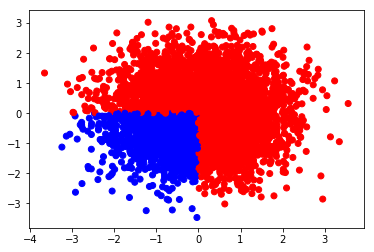

In [10]:
plt.scatter(X[:,0],X[:,1],color=color)

#### Logistic Regression Algorithm

In [11]:
# reshape matrices for convenience
# assure Y.shape returns (Y1,Y2) tuple and not (Y1,) tuple

X = X.T
Y = Y.reshape(Y.shape[0],1).T
m = X.shape[1]

In [12]:
Y.shape

(1, 5000)

In [13]:
# initialize weights to small random values
# initialize biases to zero

W = np.random.randn(1,X.shape[0])*.01 # W is layer nodes x last layer nodes
b = np.zeros((1,1)) # b is layer nodes x 1

In [14]:
# compute linear model on random weights and biases, use activation function sigmoid

Z = np.dot(W,X) + b
A = sigmoid(Z)
Yhat = (A > .5)

In [15]:
A.shape

(1, 5000)

In [16]:
# implement cost function

logprobs = np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1-A).T)
J = -1/m * np.sum(logprobs)

In [17]:
# implement gradient descent
dW = (1/m) * np.dot(X,(A-Y).T) # dJ/dW
db = (1/m) * np.sum(A-Y)

In [18]:
#checking shapes

X.shape,A.shape,Y.shape

((2, 5000), (1, 5000), (1, 5000))

In [19]:
#checking derivative shape

dW.shape

(2, 1)

In [20]:
db

0.25741696920514523

In [21]:
np.squeeze(W)-np.squeeze(dW)

array([-0.20018572, -0.19772147])

In [22]:
# update weights with gradient descent
print(W),print(b), print(dW), print(db)
W = np.squeeze(W)
b = np.squeeze(b)
W = W.reshape(W.shape[0],1)
dW = np.squeeze(dW)
db = np.squeeze(db)

[[ 0.00529795 -0.00714607]]
[[ 0.]]
[[ 0.20548367]
 [ 0.1905754 ]]
0.257416969205


In [23]:
W.T - dW

array([[-0.20018572, -0.19772147]])

In [24]:
# set learning rate alpha, update weights

alpha = .009
W = W.T - alpha*dW
b = b - alpha*db

In [25]:
W = W.reshape(1,2)

In [26]:
print(W),print(b)

[[ 0.0034486  -0.00886124]]
-0.00231675272285


(None, None)

In [27]:
# rerun forward propgation. Let's create a function!

def forward(W,b):
    Z = np.dot(W,X) + b
    A = sigmoid(Z)
    logprobs = np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1-A).T)
    J = -1/m * np.sum(logprobs)
    
    return A,J

In [28]:
print(forward(W,b)[1])

0.691562222225


In [29]:
W.shape

(1, 2)

In [30]:
def backward(X,A,Y,W,b,alpha=.009):
    
    dW = (1/m) * np.dot(X,(A-Y).T) # dJ/dW
    db = (1/m) * np.sum(A-Y)
    W = W.T - alpha*dW
    W = W.reshape(1,2)
    b = b - alpha*db
    
    return W,b

In [31]:
W.shape

(1, 2)

In [32]:
# full algorithm for number of iterations

for i in range(50000):
    A,J = forward(W,b)
    if i%1000 == 0:
        print('Iteration',str(i) + ': Cost is',J)
    W,b = backward(X,A,Y,W,b,alpha=.001)

Iteration 0: Cost is 0.691562222225
Iteration 1000: Cost is 0.577767492771
Iteration 2000: Cost is 0.506293273563
Iteration 3000: Cost is 0.458669505138
Iteration 4000: Cost is 0.425058602038
Iteration 5000: Cost is 0.400182023114
Iteration 6000: Cost is 0.381059379711
Iteration 7000: Cost is 0.365910265995
Iteration 8000: Cost is 0.3536150033
Iteration 9000: Cost is 0.343437365429
Iteration 10000: Cost is 0.334874468007
Iteration 11000: Cost is 0.327571448204
Iteration 12000: Cost is 0.321270801521
Iteration 13000: Cost is 0.315781110236
Iteration 14000: Cost is 0.31095707042
Iteration 15000: Cost is 0.306686344301
Iteration 16000: Cost is 0.302880670747
Iteration 17000: Cost is 0.299469709792
Iteration 18000: Cost is 0.296396688534
Iteration 19000: Cost is 0.293615261747
Iteration 20000: Cost is 0.291087208957
Iteration 21000: Cost is 0.288780718553
Iteration 22000: Cost is 0.286669091076
Iteration 23000: Cost is 0.284729746536
Iteration 24000: Cost is 0.282943455491
Iteration 25000:

Great! We know the cost is decreasing at every iteration. It's a good sign.

In [33]:
# check weights and bias

W,b

(array([[-1.85446397, -1.78289698]]), -2.0441255611160831)

#### Test Set Predictions

We know that Y should equal 1 when both features of X are negative. Let's see how well we can predict!

In [34]:
examples = np.random.randn(25,2)

From the examples below, we can see that the first row should be Y=1, and the eigth, etc.

In [35]:
examples

array([[-0.46056998, -0.12838416],
       [ 1.10074097,  1.23520074],
       [ 0.99506555, -1.26174944],
       [ 1.19942522, -1.10580462],
       [-1.2156631 ,  1.50056028],
       [-1.55109937,  0.5606815 ],
       [ 0.17372175,  0.40152471],
       [-2.03172163, -0.69032398],
       [-0.29282403, -0.562083  ],
       [ 0.53337841, -1.86229855],
       [-0.18746446,  0.189388  ],
       [-1.34805491, -0.77326268],
       [-0.71215224,  0.98809556],
       [ 0.20397405,  0.58854565],
       [ 1.89430983, -1.16275226],
       [ 0.72497131,  2.27706145],
       [-1.09696659,  0.98738222],
       [-1.37709139, -0.29265197],
       [-1.48329102,  2.17675507],
       [ 0.59229108, -0.72092937],
       [-0.71775359, -0.5730048 ],
       [ 0.83294798,  0.54312357],
       [-0.98212707, -0.1388058 ],
       [-0.12643285, -0.55174288],
       [ 1.03037329, -0.07960365]])

In [43]:
output = [sigmoid(example[0]*np.squeeze(W)[0]+example[1]*np.squeeze(W)[1]+b) for example in examples]

Let's create a dataframe to view the results more easily

In [58]:
df = pd.DataFrame(examples)
df.columns = ['X1','X2']
df['Y'] = (pd.Series(output) > .5).apply(int)

In [59]:
df

,X1,X2,Y
0,-0.460570,-0.128384,0
1,1.100741,1.235201,0
2,0.995066,-1.261749,0
3,1.199425,-1.105805,0
4,-1.215663,1.500560,0
5,-1.551099,0.560681,0
6,0.173722,0.401525,0
7,-2.031722,-0.690324,1
8,-0.292824,-0.562083,0
9,0.533378,-1.862299,1


We know the true Y's in this case, which we can easily determine:

In [60]:
y_true = ((examples[:,0] < 0) & (examples[:,1] < 0))
df['Y_true'] = pd.Series(y_true).apply(int)

In [61]:
df

,X1,X2,Y,Y_true
0,-0.460570,-0.128384,0,1
1,1.100741,1.235201,0,0
2,0.995066,-1.261749,0,0
3,1.199425,-1.105805,0,0
4,-1.215663,1.500560,0,0
5,-1.551099,0.560681,0,0
6,0.173722,0.401525,0,0
7,-2.031722,-0.690324,1,1
8,-0.292824,-0.562083,0,1
9,0.533378,-1.862299,1,0


Doesn't look too great. Let's have a look at the confusion matrix and classification table

In [64]:
print(confusion_matrix(df['Y'],df['Y_true']))

[[16  3]
 [ 1  5]]


In [65]:
print(classification_report(df['Y'],df['Y_true']))

             precision    recall  f1-score   support

          0       0.94      0.84      0.89        19
          1       0.62      0.83      0.71         6

avg / total       0.87      0.84      0.85        25



### Conclusion: We are good at predicting class 0, but not too great at predicting class 1. We see that of the 8 true class 1 targets, we only caught 5 with our model. An easy explanation could be that we used a linear model when computing the sigmoid function whereas the true decision boundary is not linearly separable